In [9]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5)

from matplotlib import rc
rc('font', size=12)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)

# Load and parse cell info

In [10]:
df_orig = pd.read_csv('FeatureAndTagTable-vertices.csv', header=[0,1,2])
print(set([i[0] for i in df_orig.keys()]))

{'Track N spots', 'Spot quick mean', 'Spot center intensity', 'ID', 'Spot intensity', 'Label', 'Spot N links', 'Spot position', 'Spot track ID', 'Spot radius', 'Spot frame'}


In [11]:
df_orig

Label                 ID       Spot N links  \
      Unnamed: 0_level_1 Unnamed: 1_level_1                      
      Unnamed: 0_level_2 Unnamed: 1_level_2 Unnamed: 2_level_2   
0                      0                  0                  1   
1                      1                  1                  1   
..                   ...                ...                ...   
71514              71514              71514                  1   
71515              71515              71515                  1   

      Spot center intensity                     Spot frame Spot intensity  \
                 Center ch1  Center ch2                          Mean ch1   
                   (Counts)    (Counts) Unnamed: 5_level_2       (Counts)   
0                154.188469  150.111497                  0     152.975472   
1                166.609838  121.092236                  0     164.108401   
..                      ...         ...                ...            ...   
71514            169.416404  128.861994                199     170.336907   
71515            215.351610  132.861524                199     205.788820   

                                                                     \
         Std ch1  Min ch1  Max ch1 Median ch1   Sum ch1    Mean ch2   
        (Counts) (Counts) (Counts)   (Counts)  (Counts)    (Counts)   
0      10.456922    127.0    141.0      152.0   81077.0  128.847170   
1       8.065789    132.0    153.0      164.0  181668.0  111.072267   
..           ...      ...      ...        ...       ...         ...   
71514  20.312119    126.0    149.0      167.0  222460.0  123.301685   
71515  21.560637    149.0    203.0      204.0  198792.0  120.013458   

                                                        Spot position  \
         Std ch2  Min ch2  Max ch2 Median ch2   Sum ch2             X   
        (Counts) (Counts) (Counts)   (Counts)  (Counts)          (um)   
0      29.059310     65.0    308.0      127.0   68289.0    351.432455   
1      15.247631     57.0    458.0      111.0  122957.0    323.637516   
..           ...      ...      ...        ...       ...           ...   
71514  26.392138     59.0    119.0      120.0  161032.0    339.300382   
71515  23.125403     52.0     91.0      121.0  115933.0    284.532876   

                            Spot quick mean             Spot radius  \
                Y         Z        Mean ch1    Mean ch2               
             (um)      (um)        (Counts)    (Counts)        (um)   
0      237.689199   65.7790      150.818182   92.545455    2.744923   
1      239.316956  108.0292      157.277778   91.277778    3.575044   
..            ...       ...             ...         ...         ...   
71514  211.603838   68.9128      167.130435  105.826087    3.762425   
71515  146.296652   77.1164      192.000000  100.421053    3.452802   

            Spot track ID       Track N spots  
                                               
      Unnamed: 24_level_2 Unnamed: 25_level_2  
0                       0                  13  
1                    2025                  23  
..                    ...                 ...  
71514                 585                  35  
71515                1314                   7  

[71516 rows x 26 columns]

In [12]:
df_cells = pd.DataFrame({})
# df['label'] = df_orig['Label']['Unnamed: 0_level_1']['Unnamed: 0_level_2']
df_cells['id'] = df_orig['ID']['Unnamed: 1_level_1']['Unnamed: 1_level_2']
df_cells['n_links'] = df_orig['Spot N links'][' ']['Unnamed: 2_level_2']
df_cells['mean-ch1'] = df_orig['Spot intensity']['Mean ch1']['(Counts)']
df_cells['mean-ch2'] = df_orig['Spot intensity']['Mean ch2']['(Counts)']
df_cells['x'] = df_orig['Spot position']['X']['(um)']
df_cells['y'] = df_orig['Spot position']['Y']['(um)']
df_cells['z'] = df_orig['Spot position']['Z']['(um)']
df_cells['t'] = df_orig['Spot frame'][' ']['Unnamed: 5_level_2']
df_cells['r'] = df_orig['Spot radius'][' ']['(um)']
df_cells['track_id'] = df_orig['Spot track ID'][' ']['Unnamed: 24_level_2']
df_cells['track_n_spots'] = df_orig['Track N spots']


### remove cells that do not belong to any track

In [13]:
df_cells = df_cells[df_cells.n_links!=0]
df_cells = df_cells.reset_index(drop=True)

In [14]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  152.975472  128.847170  351.432455  237.689199   
1          1        1  164.108401  111.072267  323.637516  239.316956   
...      ...      ...         ...         ...         ...         ...   
71387  71514        1  170.336907  123.301685  339.300382  211.603838   
71388  71515        1  205.788820  120.013458  284.532876  146.296652   

              z    t         r  track_id  track_n_spots  
0       65.7790    0  2.744923         0             13  
1      108.0292    0  3.575044      2025             23  
...         ...  ...       ...       ...            ...  
71387   68.9128  199  3.762425       585             35  
71388   77.1164  199  3.452802      1314              7  

[71389 rows x 11 columns]

# Load and parse edge info

In [15]:
df_orig = pd.read_csv('FeatureAndTagTable-edges.csv', header=[0,1,2])
print(set([i[0] for i in df_orig.keys()]))

{'ID', 'Link target IDs', 'Label', 'Link displacement', 'Link velocity'}


In [16]:
df_orig

Label                 ID Link displacement  \
      Unnamed: 0_level_1 Unnamed: 1_level_1                     
      Unnamed: 0_level_2 Unnamed: 1_level_2              (um)   
0                0 ? 267                  0          1.592623   
1                1 ? 268                  1          2.330528   
..                   ...                ...               ...   
69488      70603 ? 71514              69488          2.978417   
69489      70816 ? 71515              69489          6.189863   

         Link target IDs                    Link velocity  
          Source spot id     Target spot id                
      Unnamed: 3_level_2 Unnamed: 4_level_2    (um/frame)  
0                  267.0                0.0      1.592623  
1                  268.0                1.0      2.330528  
..                   ...                ...           ...  
69488            71514.0            70603.0      2.978417  
69489            71515.0            70816.0      6.189863  

[69490 rows x 6 columns]

In [17]:
df_links = pd.DataFrame({})
#df_links['link_frame'] = df_orig['TrackMate Link features']['EDGE_TIME']['(frames)']
df_links['source_id'] = df_orig['Link target IDs']['Target spot id']['Unnamed: 4_level_2'].values.astype(int)
df_links['target_id'] = df_orig['Link target IDs']['Source spot id']['Unnamed: 3_level_2'].values.astype(int)
df_links['speed'] = df_orig['Link velocity'][' ']['(um/frame)']
#df_links['directional_change_rate'] = df_orig['TrackMate Link features']['DIRECTIONAL_CHANGE_RATE']['Unnamed: 8_level_2']

#df_links = df_links.sort_values(by=['link_frame','source_id'])
df_links = df_links.reset_index(drop=True)


In [18]:
df_links

source_id  target_id     speed
0              0        267  1.592623
1              1        268  2.330528
...          ...        ...       ...
69488      70603      71514  2.978417
69489      70816      71515  6.189863

[69490 rows x 3 columns]

### extract track id info for links data

In [19]:
track_ids = df_cells.track_id.values
cell_ids = list(df_cells.id.values)
source_ids = df_links.source_id.values

sorter = np.argsort(cell_ids)
idxs = sorter[np.searchsorted(cell_ids, source_ids, sorter=sorter)]
df_links['track_id'] = track_ids[idxs]

In [20]:
df_links

source_id  target_id     speed  track_id
0              0        267  1.592623         0
1              1        268  2.330528      2025
...          ...        ...       ...       ...
69488      70603      71514  2.978417       585
69489      70816      71515  6.189863      1314

[69490 rows x 4 columns]

In [21]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  152.975472  128.847170  351.432455  237.689199   
1          1        1  164.108401  111.072267  323.637516  239.316956   
...      ...      ...         ...         ...         ...         ...   
71387  71514        1  170.336907  123.301685  339.300382  211.603838   
71388  71515        1  205.788820  120.013458  284.532876  146.296652   

              z    t         r  track_id  track_n_spots  
0       65.7790    0  2.744923         0             13  
1      108.0292    0  3.575044      2025             23  
...         ...  ...       ...       ...            ...  
71387   68.9128  199  3.762425       585             35  
71388   77.1164  199  3.452802      1314              7  

[71389 rows x 11 columns]

### remove division links

In [22]:
set(df_cells.n_links)
# 1=start or end of track
# 2=track continuation
# 3=cell division

{1, 2, 3}

In [23]:
cells_to_drop = df_cells[(df_cells.n_links==3)|((df_cells.t==0)&(df_cells.n_links==2))].id.values
to_drop = []

for c in cells_to_drop:
    links = df_links[df_links.source_id==c]
    for l in links.index:
        to_drop.append(l)
        
to_drop = set(to_drop)

df_links = df_links.drop(index=to_drop)
df_links = df_links.reset_index(drop=True)

In [24]:
df_links

source_id  target_id     speed  track_id
0              0        267  1.592623         0
1              1        268  2.330528      2025
...          ...        ...       ...       ...
67482      70603      71514  2.978417       585
67483      70816      71515  6.189863      1314

[67484 rows x 4 columns]

### remove not linked cells

In [25]:
linked_cells = list(df_links.source_id.values) + list(df_links.target_id.values)
linked_cells = list(set(linked_cells))

cells_ids = list(df_cells.id.values)

idx_to_drop = []
for i, cid in tqdm(enumerate(cells_ids), total = len(cells_ids)):
    if not cid in linked_cells:
        idx_to_drop.append(i)

df_cells = df_cells.drop(index=idx_to_drop)

df_cells = df_cells.reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████| 71389/71389 [02:46<00:00, 429.45it/s]


### create cell_id column

In [26]:
df_pruned = df_links.copy()

cell_id = 0
df_cells['cell_id'] = -1

while len(df_pruned>0):
#     print(len(df_pruned))
    current_cell = df_pruned[df_pruned.source_id==df_pruned.source_id.values[0]]
    id_sequence = [current_cell.source_id.values[0]]
    idx_sequence = [current_cell.index.values[0]]
    next_cell = df_pruned[df_pruned.source_id==current_cell.target_id.values[0]]
    
    while len(next_cell>0):
        current_cell = next_cell.copy()
        
        id_sequence.append(current_cell.source_id.values[0])
        idx_sequence.append(current_cell.index.values[0])
        next_cell = df_pruned[df_pruned.source_id==current_cell.target_id.values[0]]
    
    id_sequence.append(current_cell.target_id.values[0])
    
    for id_cell in id_sequence:
        df_cells.loc[df_cells.id==id_cell, 'cell_id'] = cell_id
    cell_id += 1
        
    df_pruned = df_pruned.drop(idx_sequence)
    df_pruned.reset_index(drop=True)


In [27]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  152.975472  128.847170  351.432455  237.689199   
1          1        1  164.108401  111.072267  323.637516  239.316956   
...      ...      ...         ...         ...         ...         ...   
71246  71514        1  170.336907  123.301685  339.300382  211.603838   
71247  71515        1  205.788820  120.013458  284.532876  146.296652   

              z    t         r  track_id  track_n_spots  cell_id  
0       65.7790    0  2.744923         0             13        0  
1      108.0292    0  3.575044      2025             23        1  
...         ...  ...       ...       ...            ...      ...  
71246   68.9128  199  3.762425       585             35     3681  
71247   77.1164  199  3.452802      1314              7     3537  

[71248 rows x 12 columns]

### append speed to df_cells

In [28]:
vel = []
cuids = df_cells.id.values
cuid_l = list(df_links.source_id.values)
vel_l = df_links.speed.values
for cuid in tqdm(cuids, total=len(df_cells)):
    if cuid in cuid_l:
        idx = cuid_l.index(cuid)
        vel.append(vel_l[idx])
    else:
        vel.append(np.nan)

100%|██████████████████████████████████████████████████████████████████████████| 71248/71248 [1:05:38<00:00, 18.09it/s]


In [29]:
df_cells['speed'] = vel

In [30]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  152.975472  128.847170  351.432455  237.689199   
1          1        1  164.108401  111.072267  323.637516  239.316956   
...      ...      ...         ...         ...         ...         ...   
71246  71514        1  170.336907  123.301685  339.300382  211.603838   
71247  71515        1  205.788820  120.013458  284.532876  146.296652   

              z    t         r  track_id  track_n_spots  cell_id     speed  
0       65.7790    0  2.744923         0             13        0  1.592623  
1      108.0292    0  3.575044      2025             23        1  2.330528  
...         ...  ...       ...       ...            ...      ...       ...  
71246   68.9128  199  3.762425       585             35     3681       NaN  
71247   77.1164  199  3.452802      1314              7     3537       NaN  

[71248 rows x 13 columns]

# Compute track info

In [31]:
# compute track df
cell_ids = list(set(df_cells.cell_id))

mean_speed = []
mean_ch1 = []
mean_ch2 = []
end2end = []
cumdist = []
track_len = []
start_track = []
end_track = []

for cell_id in tqdm(cell_ids, total=len(cell_ids)):
    df_cell = df_cells[df_cells.cell_id==cell_id]
    df_cell = df_cell.sort_values(by=['t'])
    track_len.append(len(df_cell))
    start_track.append(np.min(df_cell.t))
    end_track.append(np.max(df_cell.t))
    
    pos = df_cell[['x','y','z']].to_numpy()
    
    mean_speed.append(np.mean(df_cell.speed))
    mean_ch1.append(np.mean(df_cell['mean-ch1'].values))
    mean_ch2.append(np.mean(df_cell['mean-ch2'].values))
    end2end.append(np.linalg.norm(pos[0]-pos[-1]))
    cumdist.append(np.sum(np.sqrt(np.sum(np.diff(pos,axis=0)**2,axis=1))))
    

df_tracks = pd.DataFrame({
    'cell_id':cell_ids,
    'len':track_len,
    'start_t':start_track,
    'end_t':end_track,
    'speed':mean_speed,
    'ch1':mean_ch1,
    'ch2':mean_ch2,
    'end2end':end2end,
    'cumdist':cumdist    
})

100%|█████████████████████████████████████████████████████████████████████████████| 3786/3786 [00:05<00:00, 681.00it/s]


### save

In [32]:
df_cells.to_csv('vertices.csv')
df_links.to_csv('links_no_div.csv')
df_tracks.to_csv('tracks_no_div.csv')

# Some plots

In [33]:
df_cells = pd.read_csv('vertices.csv', index_col=0)
df_links = pd.read_csv('links_no_div.csv', index_col=0)
df_tracks = pd.read_csv('tracks_no_div.csv', index_col=0)

In [34]:
df_tracks

cell_id  len  start_t  end_t     speed         ch1         ch2  \
0           0   13        0     12  3.001925  141.048733  130.136453   
1           1   23        0     22  2.635555  160.870348  100.588001   
...       ...  ...      ...    ...       ...         ...         ...   
3784     3784    2      198    199  1.470250  203.572180   75.631539   
3785     3785    2      198    199  1.764812  136.998719   49.513765   

        end2end    cumdist  
0     12.423380  36.023101  
1     24.674100  57.982215  
...         ...        ...  
3784   6.056059   6.056059  
3785   1.764812   1.764812  

[3786 rows x 9 columns]

In [35]:
# import napari
# from skimage.io import imread
# import os
# visualize_images = True
# pxl_size = (2,0.3467,0.3467)
# scale = pxl_size[0]/pxl_size[1]

# tp=0

# #######################################
# df_cells['x_pix'] = df_cells.x/pxl_size[2]
# df_cells['y_pix'] = df_cells.y/pxl_size[1]
# df_cells['z_pix'] = df_cells.z/pxl_size[0]

# df_napari1 = df_cells[df_cells.t==tp][['z','y','x']].to_numpy()
# df_napari2 = df_cells[df_cells.t==tp][['z_pix','y_pix','x_pix']].to_numpy()

# if visualize_images:
#     img = imread(os.path.join('..','..','..',
#                                        'mKO2_reg1','tp%04d_mKO2.tif'%tp))
    
# viewer = napari.Viewer()
# if visualize_images:
#     viewer.add_image(img, scale=(scale,1,1), name='gastruloid')
# # viewer.add_points(df_napari1, name='cells', opacity=1., 
# #                   face_color='red')
# viewer.add_points(df_napari2, name='cells', opacity=1., scale=(scale,1,1),
#                   face_color='cyan')
# napari.run()

Text(0, 0.5, 'Speed (um/tp)')

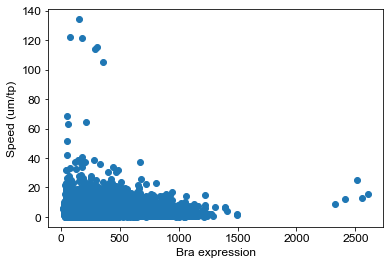

In [37]:
fig, ax = plt.subplots()
ax.plot(df_cells['mean-ch2'].values,df_cells.speed,'o')
ax.set_xlabel('Bra expression')
ax.set_ylabel('Speed (um/tp)')
# ax.set_ylim(0,20)
# ax.set_xlim(100,700)

<IPython.core.display.Javascript object>


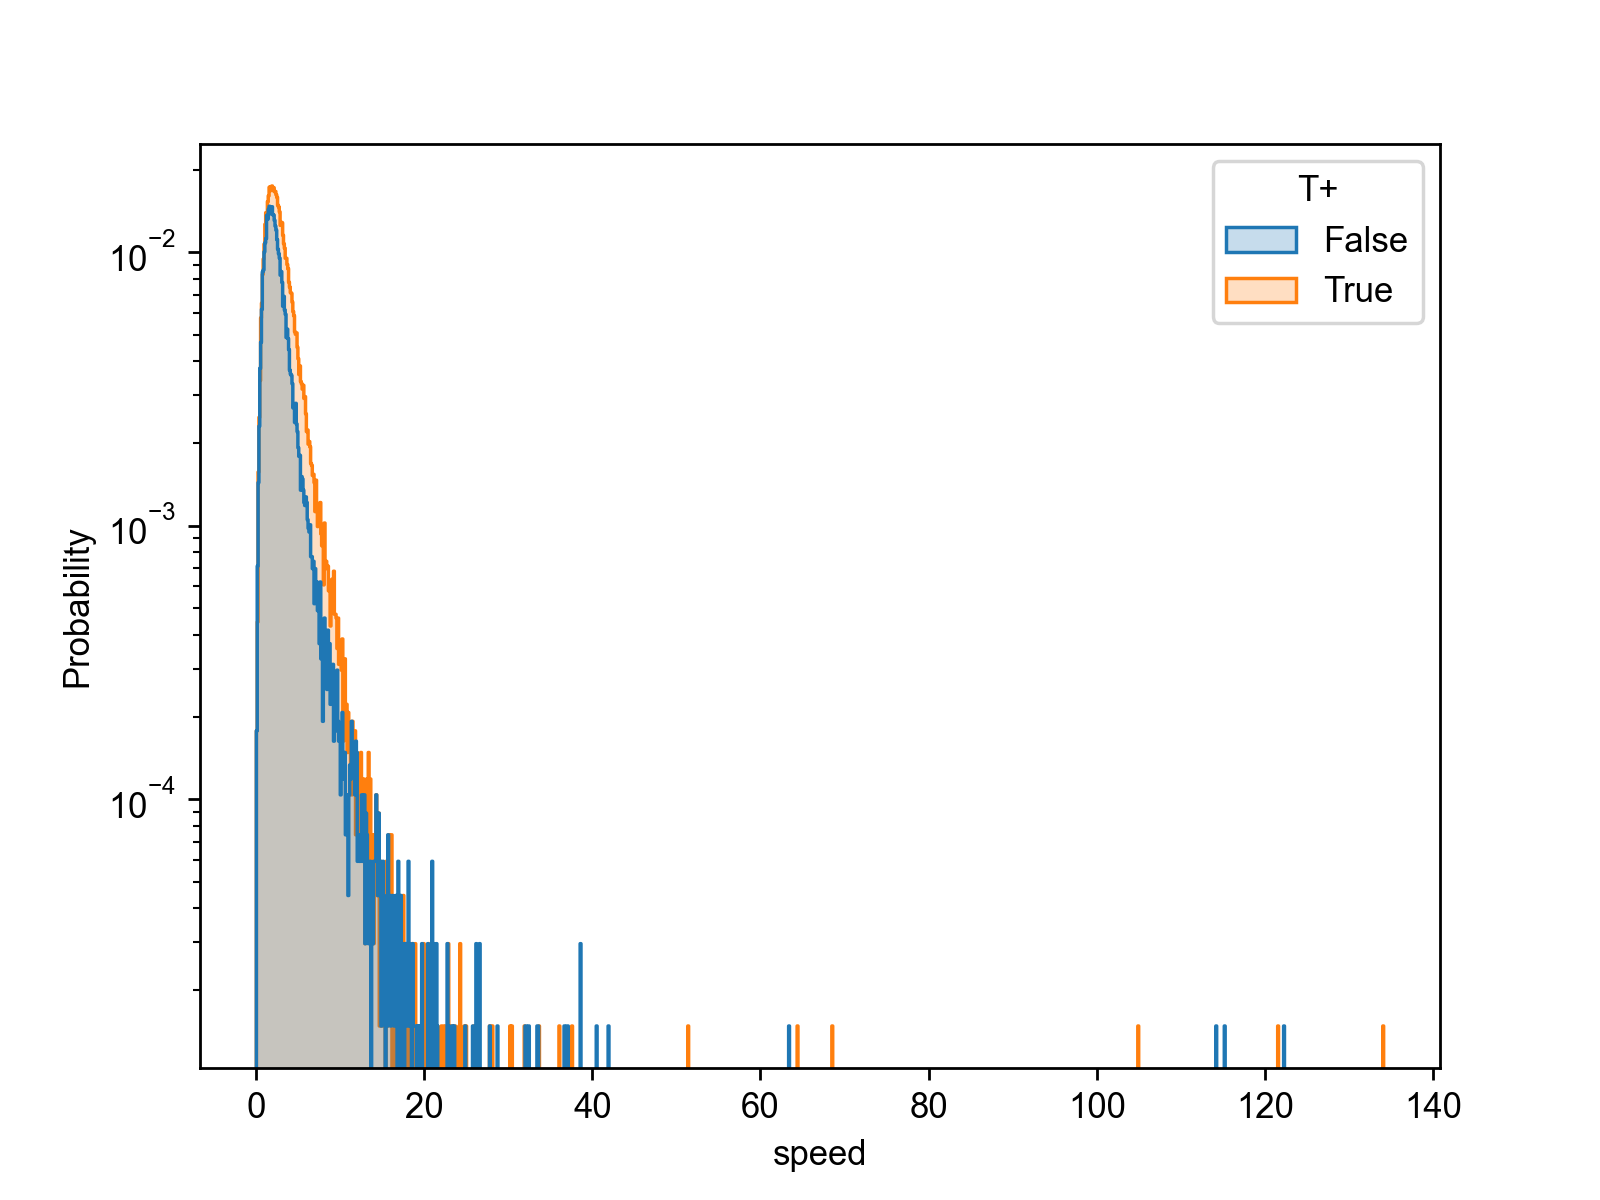

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


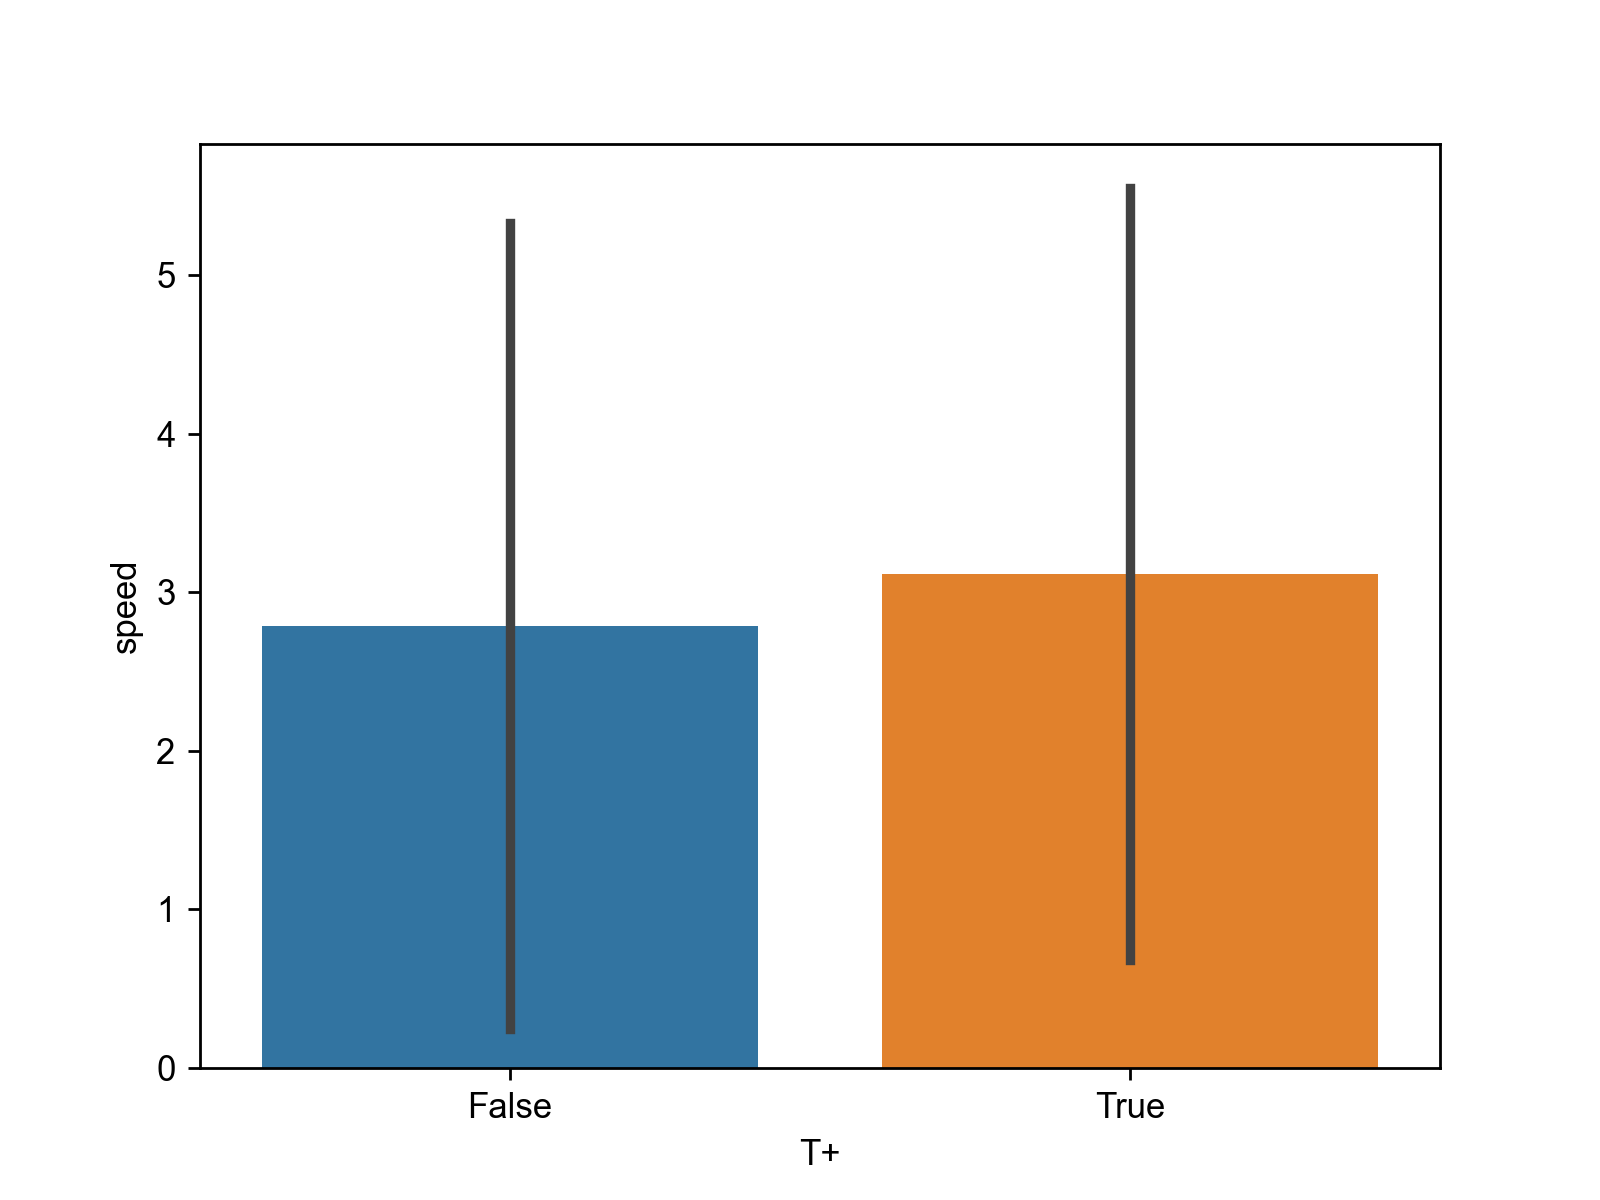

<AxesSubplot:xlabel='T+', ylabel='speed'>

In [46]:
import seaborn as sns

df_cells['T+'] = df_cells['mean-ch1'].values>160

plt.figure()
sns.histplot(df_cells, x="speed", hue="T+", element="step", log_scale=(False,True), stat='probability')

plt.figure()
sns.violinplot(data=df_cells, x="T+", y="speed")

plt.figure()
sns.barplot(data=df_cells, x="T+", y="speed", ci='sd')

<IPython.core.display.Javascript object>


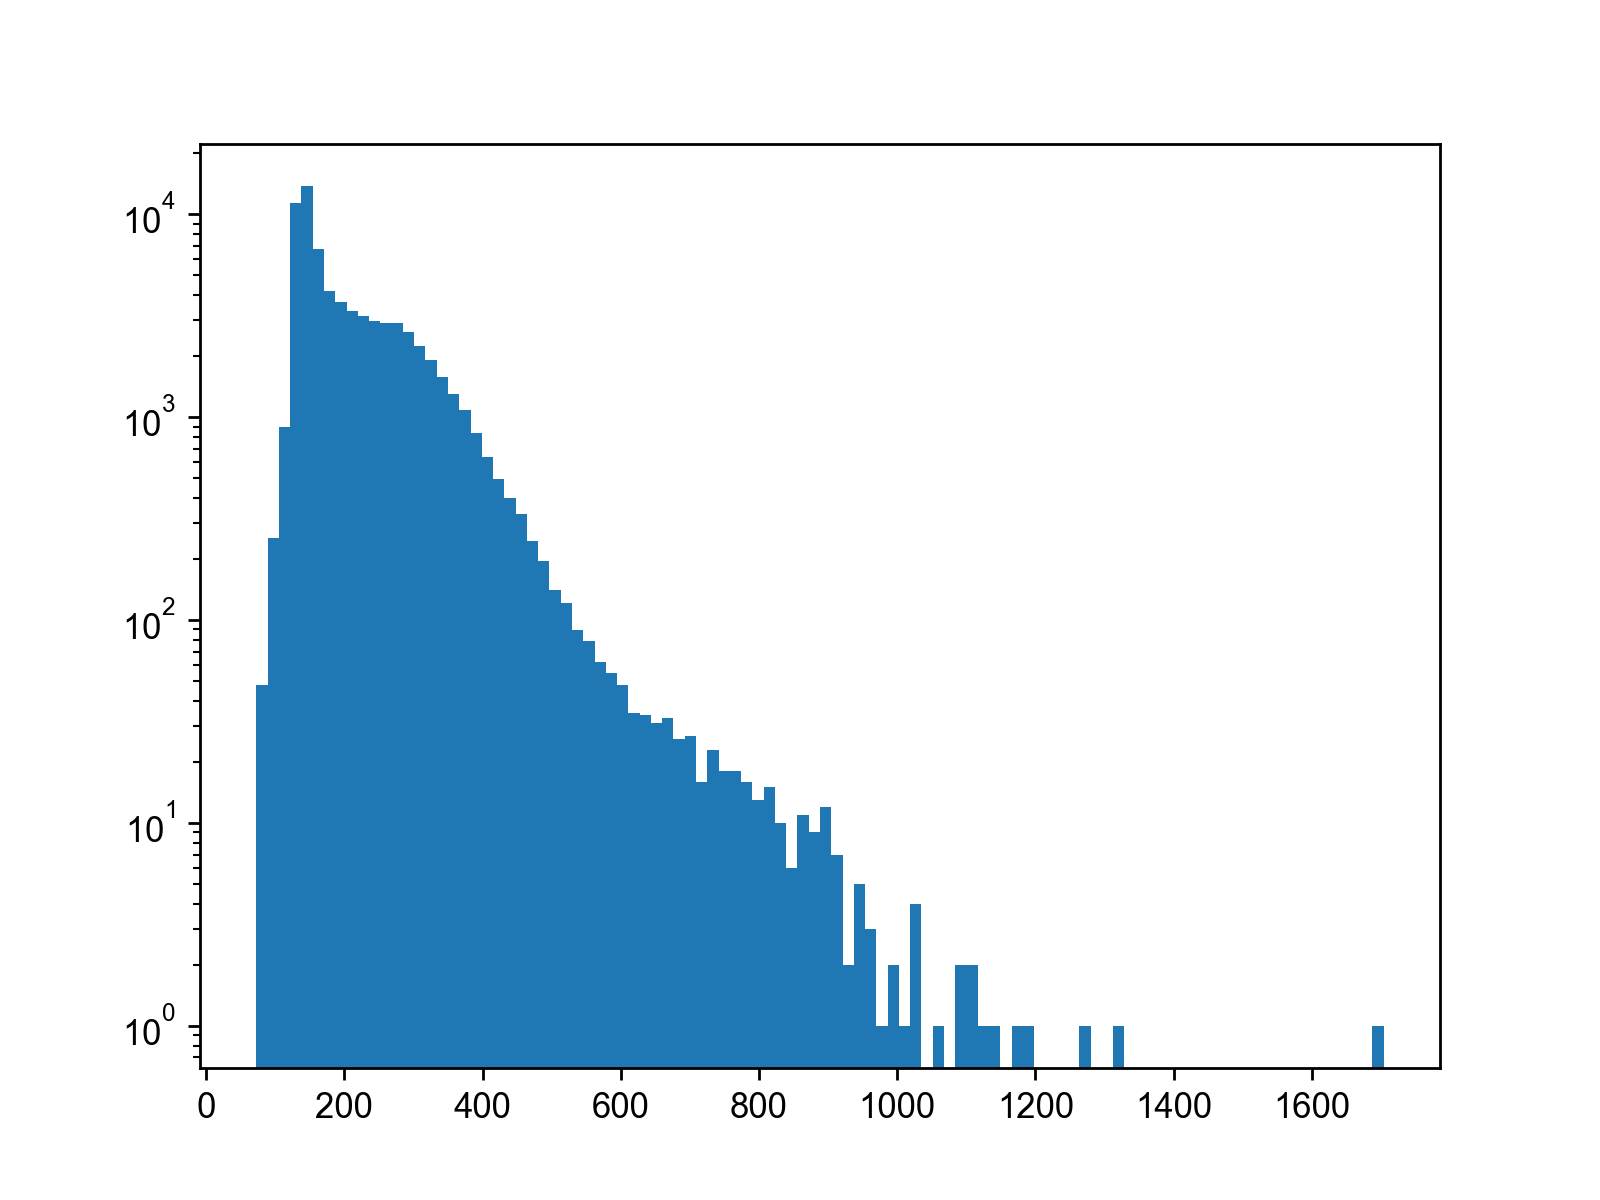

(array([4.8000e+01, 2.5300e+02, 8.9200e+02, 1.1410e+04, 1.3792e+04,
        6.7510e+03, 4.1800e+03, 3.6950e+03, 3.3390e+03, 3.1700e+03,
        2.9920e+03, 2.8990e+03, 2.9080e+03, 2.6390e+03, 2.2570e+03,
        1.9200e+03, 1.5730e+03, 1.3050e+03, 1.0880e+03, 8.3700e+02,
        6.3700e+02, 4.9900e+02, 4.0200e+02, 3.3500e+02, 2.4600e+02,
        1.9600e+02, 1.4100e+02, 1.2100e+02, 8.9000e+01, 7.9000e+01,
        6.2000e+01, 5.5000e+01, 4.8000e+01, 3.5000e+01, 3.4000e+01,
        3.1000e+01, 3.3000e+01, 2.6000e+01, 2.7000e+01, 1.6000e+01,
        2.3000e+01, 1.8000e+01, 1.8000e+01, 1.6000e+01, 1.3000e+01,
        1.5000e+01, 1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00,
        1.2000e+01, 7.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

In [47]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.hist(df_cells['mean-ch1'].values, bins=100, log=True)

In [48]:
plt.figure()
plt.hist(df_cells[df_cells.t==np.max(df_cells.t)]['mean-ch1'].values, bins=200)

<IPython.core.display.Javascript object>

(array([ 5., 10., 17., 17., 23., 25., 23., 21., 10.,  9., 14., 15.,  5.,
         6.,  7.,  1.,  9.,  4., 10., 14.,  8., 13.,  4.,  7.,  4.,  3.,
         5.,  4.,  5.,  4.,  5.,  6.,  3.,  5.,  6.,  4.,  3.,  4.,  5.,
         3.,  2.,  3.,  7.,  2.,  3.,  0.,  2.,  3.,  2.,  2.,  2.,  1.,
         0.,  1.,  4.,  3.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

## Plot for last timepoint

In [79]:
thr = 160

df_lasttp = df_cells[df_cells.t==np.max(df_cells.t)]

track_ids = df_lasttp.cell_id.values
T_val = df_lasttp['mean-ch1'].values

track_Tpos = T_val>thr

In [80]:
idxs = [list(df_tracks.cell_id.values).index(i) for i in track_ids]


In [81]:
df_tracks_lasttp = df_tracks.iloc[idxs]

In [82]:
df_tracks_lasttp['Tpos'] = track_Tpos

C:\Users\anlas\AppData\Local\Temp/ipykernel_19364/2874199389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks_lasttp['Tpos'] = track_Tpos


In [83]:
df_tracks_lasttp = df_tracks_lasttp[df_tracks_lasttp.len>10]

In [84]:
#200
plt.figure()
sns.barplot(data=df_tracks_lasttp, x='Tpos', y='speed', ci='sd')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Tpos', ylabel='speed'>

### Velocity plot at different time points

T_threshold=150

For each timepoint tp, use cells in the time windfow tp-10, tp+10, and filter out track shorter than 5 tp.

Then, compute which tracks are T positive and make the velocity plot, cumdist plot and end2end plot

In [97]:
T_thr = 170
tps = np.linspace(0,200,11)
tps = [50,100,150,190]

df_tracks_tps = pd.DataFrame({})

for tp in tqdm(tps):
    # filter cells around that tp
    df_tp_original = df_cells[(df_cells.t>(tp-10))&(df_cells.t<(tp+10))]
    track_ids_original = list(set(df_tp_original.cell_id.values))

    # remove short tracks
    df_tp = pd.DataFrame({})
    for track_id in track_ids_original:
        df_cell = df_tp_original[df_tp_original.cell_id==track_id]
        if len(df_cell)>5:
            df_tp = pd.concat([df_tp,df_cell])
    df_tp = df_tp.reset_index(drop=True)
    
    # find out ids of remaining cells
    track_ids = list(set(df_tp.cell_id.values))

    # compute T positive cell
    T_val = np.array([np.mean(df_tp[df_tp.cell_id==track_id]['mean-ch1'].values) for track_id in track_ids])
    T_pos = T_val>T_thr

    # compute mean velocity
    mean_vel = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        mean_vel.append(np.mean(np.linalg.norm(np.diff(pos,axis=0),axis=1)))
        
    # compute cumdist
    cum_dist = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        cum_dist.append(np.sum(np.linalg.norm(np.diff(pos,axis=0),axis=1))/pos.shape[0])
    
    # compute endo2end
    end2end = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        end2end.append(np.linalg.norm(pos[0]-pos[-1])/pos.shape[0])
        
    df_tracks_tp = pd.DataFrame({
        'tp': tp,
        'cell_id': track_ids,
        'T_pos': T_pos,
        'speed': mean_vel,
        'cumdist': cum_dist,
        'end2end': end2end,
    })
    
    df_tracks_tps = pd.concat([df_tracks_tps, df_tracks_tp])
    
df_tracks_tps = df_tracks_tps.reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  2.00s/it]


In [98]:
colors = ['tab:gray','tab:green']*4

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(5,8))
sns.barplot(data=df_tracks_tps, x='tp', y='speed', hue='T_pos', ci='sd', palette=colors, ax=ax[0])
sns.barplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_pos', ci='sd', palette=colors, ax=ax[1])
sns.barplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_pos', ci='sd', palette=colors, ax=ax[2])

fig.savefig('Tpos_vsTneg.pdf')

<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


### T positive activation

If cell i is positive, what fraction of the 5 closest cells will be positive after 10 timepoints? Compute number of positive cells at tp+10 - number of positive cells at tp. How does it change in funcrion of tp?

In [87]:
from scipy.ndimage import gaussian_filter1d

track_ids = df_tracks['cell_id'].values

In [88]:
track_ids


array([   0,    1,    2, ..., 1976, 1977, 1978], dtype=int64)

In [89]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  156.372240  641.495268  158.326385  166.450867   
1          1        1  171.816382  848.591359  162.717006  174.964568   
...      ...      ...         ...         ...         ...         ...   
47149  47268        1  201.388730  397.867240  206.900116  212.074247   
47150  47270        1  158.854149  743.719195  260.449077  315.489789   

             z    t         r  track_id  track_n_spots  cell_id     speed  \
0      35.1136    0  3.673884         0             31        0  2.259575   
1      31.1066    0  3.925749      1004             21        1  4.336335   
...        ...  ...       ...       ...            ...      ...       ...   
47149  24.3908  199  3.770066       947            364     1934       NaN   
47150  87.4950  199  3.967094       985            345     1953       NaN   

         T+  
0      True  
1      True  
...     ...  
47149  True  
47150  True  

[47151 rows x 14 columns]

In [90]:
df_cells['ch1_filt'] = 0.
df_cells['T+_filt'] = False
for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    ch1_filt = gaussian_filter1d(df_cell['mean-ch1'].values,1.5)
    df_cells.loc[df_cells.cell_id==t,'ch1_filt'] = ch1_filt
    df_cells.loc[df_cells.cell_id==t,'T+_filt'] = ch1_filt>150

In [91]:
df_cells

id  n_links    mean-ch1    mean-ch2           x           y  \
0          0        1  156.372240  641.495268  158.326385  166.450867   
1          1        1  171.816382  848.591359  162.717006  174.964568   
...      ...      ...         ...         ...         ...         ...   
47149  47268        1  201.388730  397.867240  206.900116  212.074247   
47150  47270        1  158.854149  743.719195  260.449077  315.489789   

             z    t         r  track_id  track_n_spots  cell_id     speed  \
0      35.1136    0  3.673884         0             31        0  2.259575   
1      31.1066    0  3.925749      1004             21        1  4.336335   
...        ...  ...       ...       ...            ...      ...       ...   
47149  24.3908  199  3.770066       947            364     1934       NaN   
47150  87.4950  199  3.967094       985            345     1953       NaN   

         T+    ch1_filt  T+_filt  
0      True  158.174596     True  
1      True  171.191897     True  
...     ...         ...      ...  
47149  True  215.946153     True  
47150  True  157.271704     True  

[47151 rows x 16 columns]

<IPython.core.display.Javascript object>


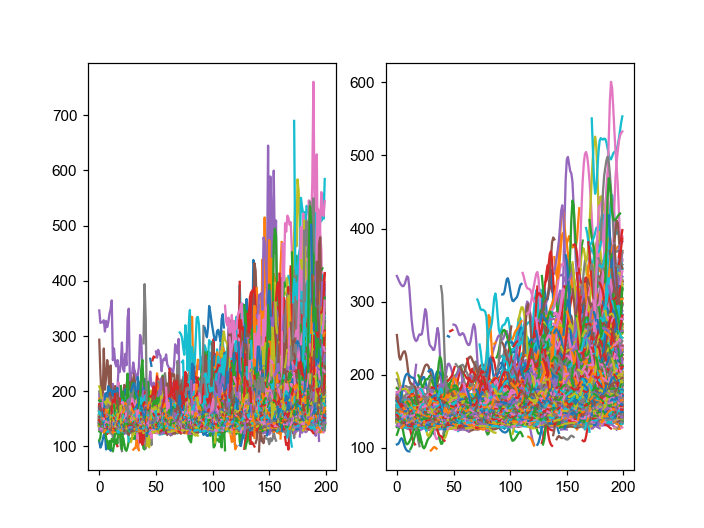

In [92]:
fig, ax = plt.subplots(1,2)

for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    ax[0].plot(df_cell.t,df_cell['mean-ch1'].values)
    ax[1].plot(df_cell.t,df_cell['ch1_filt'].values)

<IPython.core.display.Javascript object>


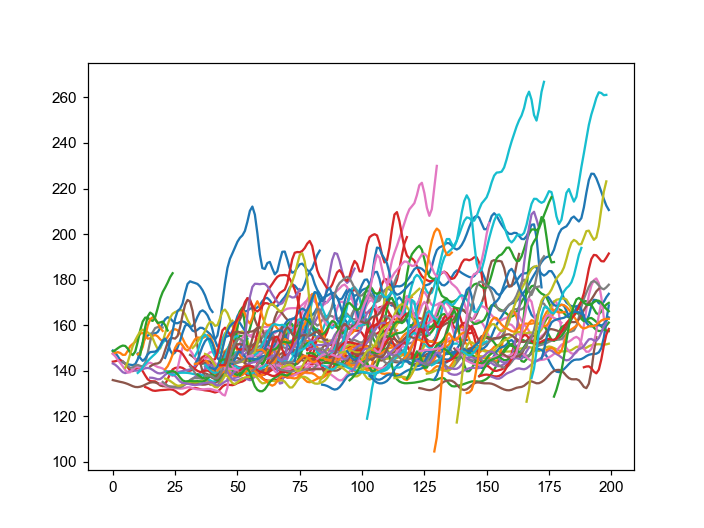

In [93]:
plt.figure()
t_thr = 150

tracks_switch = []
i = 0
for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    if len(df_cell)>10:
        if df_cell.ch1_filt.values[-1]>t_thr:
            if df_cell.ch1_filt.values[0]<t_thr:
                plt.plot(df_cell.t,df_cell.ch1_filt.values)
                tracks_switch.append(df_cell.cell_id.values[0])
                i+=1

In [26]:
from sklearn.neighbors import NearestNeighbors
plt.figure()
t_thr = 150

i = 0
for tsw in tracks_switch:
    df_cell = df_cells[df_cells.cell_id==tsw]
    
    # find last tp that cell is negative
    last_tp = df_cell[df_cell['T+_filt']==False].iloc[-1].t
    my_pos = df_cell[df_cell.t==last_tp][['x','y','z']].to_numpy()
    
    # compute distances to all other cells
    df_cells_tp = df_cells[df_cells.t==last_tp]
    others_pos = df_cells_tp[['x','y','z']].to_numpy()
    others_ids = df_cells_tp.cell_id.values
    
    nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(others_pos)
    distances, indices = nbrs.kneighbors(my_pos)
    # remove the cell itself
    indices = indices[1:]
    close_ids = others_ids[indices]
    
    
    
    
    


210